In [64]:
#Exercici 1
#Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [65]:
import numpy as np
import pandas as pd
df=pd.read_csv('C:\\Users\client277192\\Documents\\01-IT ACADEMY. DATA SCIENCE\\Test Hipotesis and Machine Learning\\M5\\housing data.csv')
df.columns=['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']             
df.shape

(505, 14)

In [66]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [68]:
#numero de datos ausentes por variable
df.isna().sum().sort_values()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [69]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [70]:
import numpy as np

from sklearn.model_selection import train_test_split

In [71]:
# columna dependiente es MEDV, que es el precio de la vivienda

X= df[['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']]
y= df['MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [72]:
y

0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
500    22.4
501    20.6
502    23.9
503    22.0
504    11.9
Name: MEDV, Length: 505, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [74]:
X_train.shape
print(f'los datos para el entrenamiento son: {X_train.shape}, un 80% del total de datos')

los datos para el entrenamiento son: (404, 13), un 80% del total de datos


In [75]:
X_train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.89,10.69,11.52,0.07,0.56,6.26,69.19,3.74,9.97,418.48,18.58,351.91,13.06
std,9.18,22.93,6.90,0.26,0.12,0.70,27.91,2.12,8.90,171.42,2.13,97.15,7.07
min,0.01,0.00,0.74,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.09,0.00,5.32,0.00,0.45,5.88,46.18,2.01,4.00,283.25,17.40,372.30,7.59
50%,0.29,0.00,9.90,0.00,0.54,6.17,77.95,3.09,5.00,349.50,19.10,391.26,12.04
75%,4.23,3.12,18.10,0.00,0.63,6.60,94.15,4.89,24.00,666.00,20.20,395.94,17.27
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [76]:
X_test.shape
print(f'los datos para el test son: {X_test.shape}, un 20% del total de datos')

los datos para el test son: (101, 13), un 20% del total de datos


In [77]:
X_test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,2.55,13.99,9.71,0.06,0.54,6.37,66.15,4.02,7.95,368.39,18.00,375.35,11.11
std,5.72,24.86,6.53,0.24,0.11,0.70,29.22,2.06,7.70,151.24,2.25,59.98,7.23
min,0.01,0.00,0.46,0.00,0.39,4.65,6.20,1.17,1.00,188.00,12.60,27.25,1.92
25%,0.07,0.00,4.05,0.00,0.45,6.01,38.50,2.28,4.00,273.00,16.60,385.05,6.05
50%,0.20,0.00,7.38,0.00,0.51,6.31,71.90,3.38,5.00,307.00,18.00,392.85,8.16
75%,0.83,20.00,18.10,0.00,0.60,6.74,93.40,5.65,8.00,403.00,20.20,396.90,14.37
max,28.66,90.00,25.65,1.00,0.87,8.27,100.00,10.71,24.00,666.00,21.20,396.90,34.77


EXERCICI 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [102]:
#NORMALIZACION DE LOS DATOS. Ajusto los valores de las caracteristicas en un rango de 0 y 1

from sklearn.preprocessing import Normalizer
datos_normalizados=Normalizer().transform(df.T)
datos_normalizados



array([[8.70655634e-05, 8.69701491e-05, 1.11205385e-04, ...,
        2.46646007e-04, 4.79600060e-04, 1.82956951e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.31616532e-02, 2.31616532e-02, 6.02693549e-03, ...,
        4.01912500e-02, 4.01912500e-02, 4.01912500e-02],
       ...,
       [4.79839124e-02, 4.74914656e-02, 4.77092553e-02, ...,
        4.79839124e-02, 4.75664821e-02, 4.79839124e-02],
       [2.52511118e-02, 7.83772700e-03, 4.12332594e-03, ...,
        1.33241359e-02, 1.61866101e-02, 2.09574004e-02],
       [3.73152122e-02, 6.67627591e-02, 6.38404834e-02, ...,
        4.24853922e-02, 3.82143739e-02, 1.55105400e-02]])

In [79]:

#ESTANDARIZACIO DE DADES NUMERIQUES. Porque tengo variables con diferentes escalas. Tranformo los datos para que tengan un media de 0 y una desviación estandar de 1

from sklearn.preprocessing import MinMaxScaler
numeric_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV' ]
X_numeric = df[numeric_columns] #cra dataframe nuevo que contiene sólo las columnas seleccionadas
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numeric) #aplica el transformador a las columnas seleccionadas. devuelve un nuevo array X_normalized
df[numeric_columns] = X_normalized  #reemplaza las originales por las transformadas
df[numeric_columns]


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000205,0.0,0.242302,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
1,0.000205,0.0,0.242302,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
2,0.000262,0.0,0.063050,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
3,0.000674,0.0,0.063050,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
4,0.000234,0.0,0.063050,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026,0.526667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.000602,0.0,0.420455,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
501,0.000407,0.0,0.420455,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
502,0.000581,0.0,0.420455,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
503,0.001130,0.0,0.420455,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


EXERCICI 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [81]:
#Estandarización de los datos numericos

df[numeric_columns].describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.040595,0.113505,0.392018,0.349235,0.521759,0.676432,0.242328,0.372449,0.422632,0.623594,0.898367,0.301828,0.389553
std,0.096761,0.233437,0.251315,0.238663,0.134737,0.290179,0.191668,0.378589,0.321813,0.230055,0.230389,0.197018,0.204578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000822,0.000000,0.173387,0.131687,0.445296,0.433574,0.088243,0.130435,0.175573,0.510638,0.945610,0.145695,0.266667
50%,0.002811,0.000000,0.338343,0.314815,0.507185,0.770340,0.188198,0.173913,0.272901,0.691489,0.986207,0.266280,0.360000
75%,0.041242,0.125000,0.646628,0.491770,0.587086,0.939238,0.371223,1.000000,0.914122,0.808511,0.998260,0.420254,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

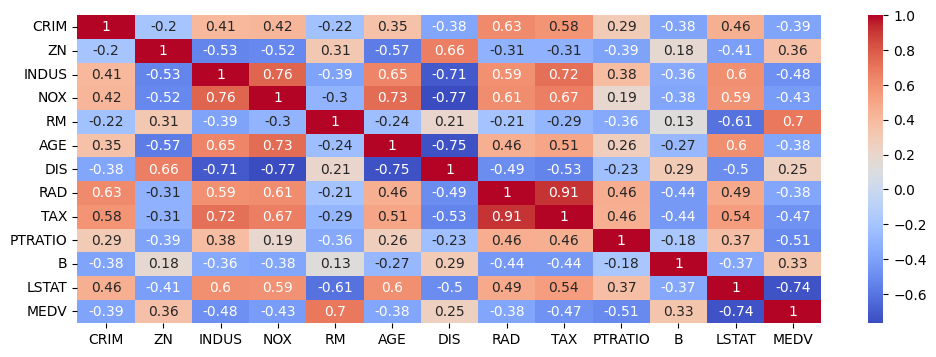

In [82]:
plt.figure(figsize=(12,4))

sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', vmax=1.0)


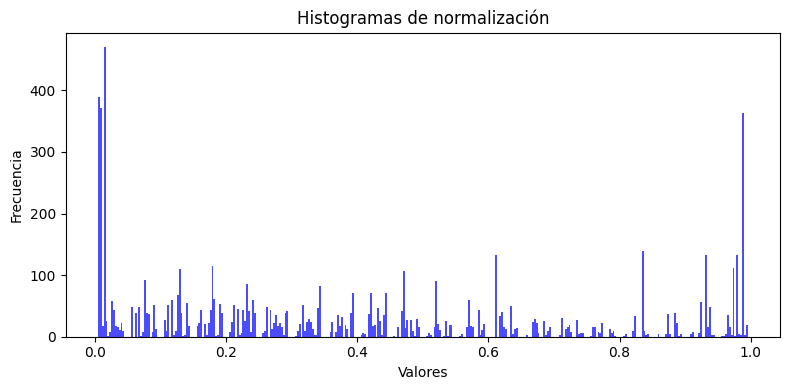

In [96]:
#Normalización de los datos

plt.figure(figsize=(8, 4))

num_columnas=df.shape[1]
colors=['blue']*num_columnas
plt.hist(df.values, bins=20, color=colors, alpha=0.7)
plt.title('Histogramas de normalización')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()
